In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [4]:
volve = pd.read_csv('vpd.csv')

In [5]:
dfwellpf12 = pd.read_csv('Final PF-12 and Injection.csv',index_col=0,parse_dates=True)


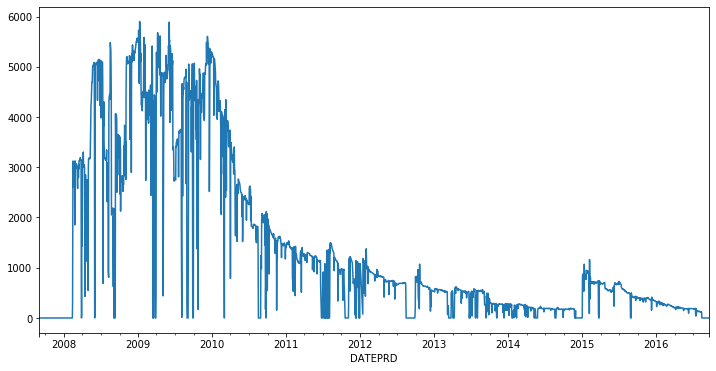

In [6]:
dfwellpf12['BORE_OIL_VOL'].plot(figsize=(12,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CB1ABC048>,
      dtype=object)

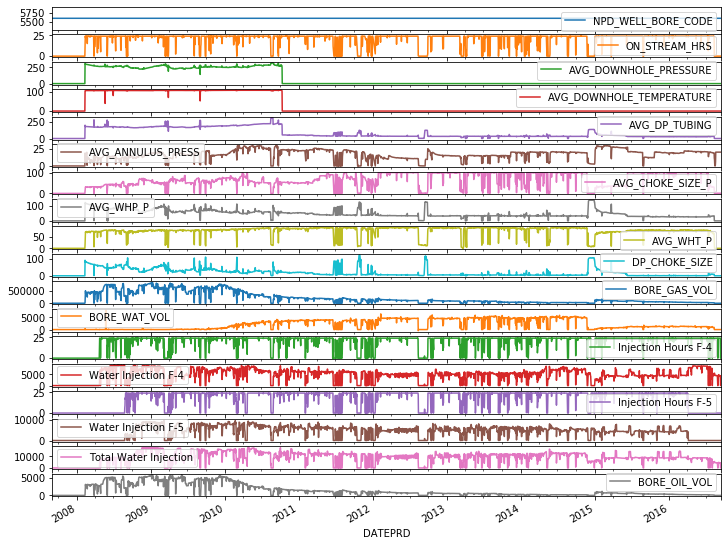

In [7]:
dfwellpf12.plot(figsize = (12,10),subplots = True)

In [8]:
dfwellpf12.columns

Index(['NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'Injection Hours F-4',
       'Water Injection F-4', 'Injection Hours F-5', 'Water Injection F-5',
       'Total Water Injection', 'BORE_OIL_VOL'],
      dtype='object')

In [121]:
to_drop =["BORE_GAS_VOL",'AVG_DOWNHOLE_PRESSURE',
          'AVG_DOWNHOLE_TEMPERATURE','NPD_WELL_BORE_CODE', 
          'Water Injection F-4', 
          'Injection Hours F-5','Injection Hours F-4',
          'Water Injection F-5','BORE_OIL_VOL','BORE_WAT_VOL']


In [122]:
dfwellpf12.shape

(3305, 18)

In [123]:
dfwellpf12 = dfwellpf12.rolling('30D').mean()

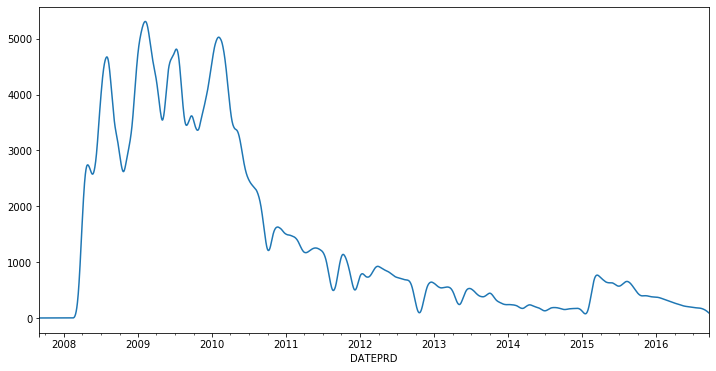

In [124]:
dfwellpf12['BORE_OIL_VOL'].plot(figsize=(12,6))

In [125]:
df_train = dfwellpf12.iloc[:3000, :]
df_test = dfwellpf12.iloc[3000:, :]

In [126]:
X_train = df_train.drop(to_drop,axis = 1)
X_test = df_test.drop(to_drop,axis = 1)

In [127]:
y_train = df_train['BORE_OIL_VOL']
y_test = df_test['BORE_OIL_VOL']

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
regressor = RandomForestRegressor(n_estimators=200)
gbr = RandomForestRegressor(n_estimators=200)

regressor.fit(X_train,y_train)
gbr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [129]:
regressor.score(X_test,y_test)

-7.7397551867491305

In [130]:
gbr.score(X_test,y_test)

-7.781974355888415

In [131]:
y_predictrfr = regressor.predict(X_test)
y_predictgbr = gbr.predict(X_test)

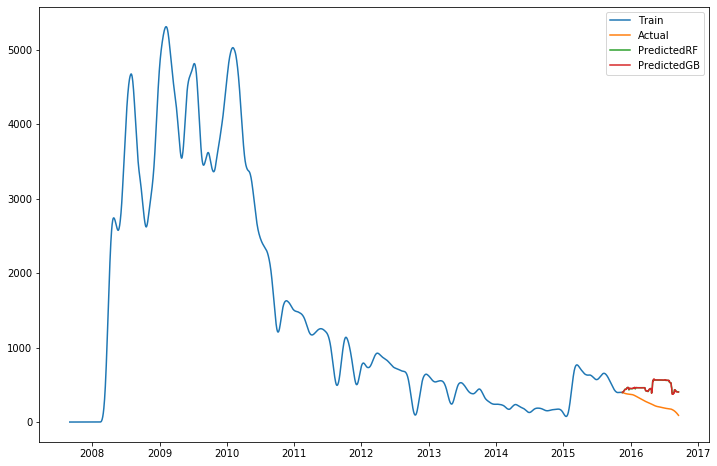

In [134]:
plt.figure(figsize=(12,8))
plt.plot(X_train.index,y_train,label = 'Train')

plt.plot(X_test.index,y_test,label= 'Actual')
plt.plot(X_test.index,y_predictrfr,label = 'PredictedRF')
plt.plot(X_test.index,y_predictgbr,label = 'PredictedGB')

plt.legend()

## Well PF 1 C

In [5]:
well5 = volve['NPD_WELL_BORE_NAME'] == '15/9-F-1 C'
df = volve[well5].reset_index().drop('index',axis = 1)


In [6]:
df.isna().sum()

DATEPRD                       0
NPD_WELL_BORE_CODE            0
NPD_WELL_BORE_NAME            0
ON_STREAM_HRS                 0
AVG_DOWNHOLE_PRESSURE         3
AVG_DOWNHOLE_TEMPERATURE      3
AVG_DP_TUBING                 3
AVG_ANNULUS_PRESS           729
AVG_CHOKE_SIZE_P              0
AVG_CHOKE_UOM                 0
AVG_WHP_P                     0
AVG_WHT_P                     0
DP_CHOKE_SIZE                 0
BORE_OIL_VOL                  0
BORE_GAS_VOL                  0
BORE_WAT_VOL                  0
BORE_WI_VOL                 746
FLOW_KIND                     0
WELL_TYPE                     0
dtype: int64

In [7]:
df = df.fillna(0)

In [8]:
#df.to_csv('PF-1C.csv')

In [9]:
df1c = pd.read_csv('PF-1C.csv',index_col=0,parse_dates=True)

In [10]:
df1c

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DATEPRD,,,,,,,,,,,,,,
2014-04-07,7405,15/9-F-1 C,0.0,0.000,0.000,0.000,0,0.00000,0.000,0.000,0.000,0,0,0
2014-04-08,7405,15/9-F-1 C,0.0,0.000,0.000,0.000,0,1.00306,0.000,0.000,0.000,0,0,0
2014-04-09,7405,15/9-F-1 C,0.0,0.000,0.000,0.000,0,0.97901,0.000,0.000,0.000,0,0,0
2014-04-10,7405,15/9-F-1 C,0.0,0.000,0.000,0.000,0,0.54576,0.000,0.000,0.000,0,0,0
2014-04-11,7405,15/9-F-1 C,0.0,310.376,96.876,277.278,0,1.21599,33.098,10.480,33.072,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-17,7405,15/9-F-1 C,0.0,270.268,101.198,263.770,0,0.00000,6.498,9.802,2.645,0,0,0
2016-04-18,7405,15/9-F-1 C,0.0,276.869,101.231,263.155,0,0.00000,13.714,11.742,4.120,0,0,0
2016-04-19,7405,15/9-F-1 C,0.0,282.105,101.178,273.530,0,0.26519,8.576,10.119,1.866,0,0,0


In [11]:
to_drop =["BORE_GAS_VOL",'AVG_DOWNHOLE_TEMPERATURE',
          'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME','BORE_OIL_VOL','AVG_ANNULUS_PRESS']


In [12]:
X = df1c.drop(to_drop,axis = 1)
Y = df1c['BORE_OIL_VOL']

In [13]:
X.columns

Index(['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
       'BORE_WAT_VOL'],
      dtype='object')

In [14]:
X_train = X.iloc[0:540,:]
X_test = X.iloc[540:,:]
y_train = Y.iloc[0:540]
y_test = Y.iloc[540:]

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
rf = RandomForestRegressor(n_estimators=100)
gb = GradientBoostingRegressor(n_estimators=100)

In [17]:
rf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [18]:
gb.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
rf.score(X_test,y_test)

0.8358458475439229

In [20]:
gb.score(X_test,y_test)

0.7345394154613981

In [21]:
y_predict_RF = rf.predict(X_test)
y_predict_GB = gb.predict(X_test)

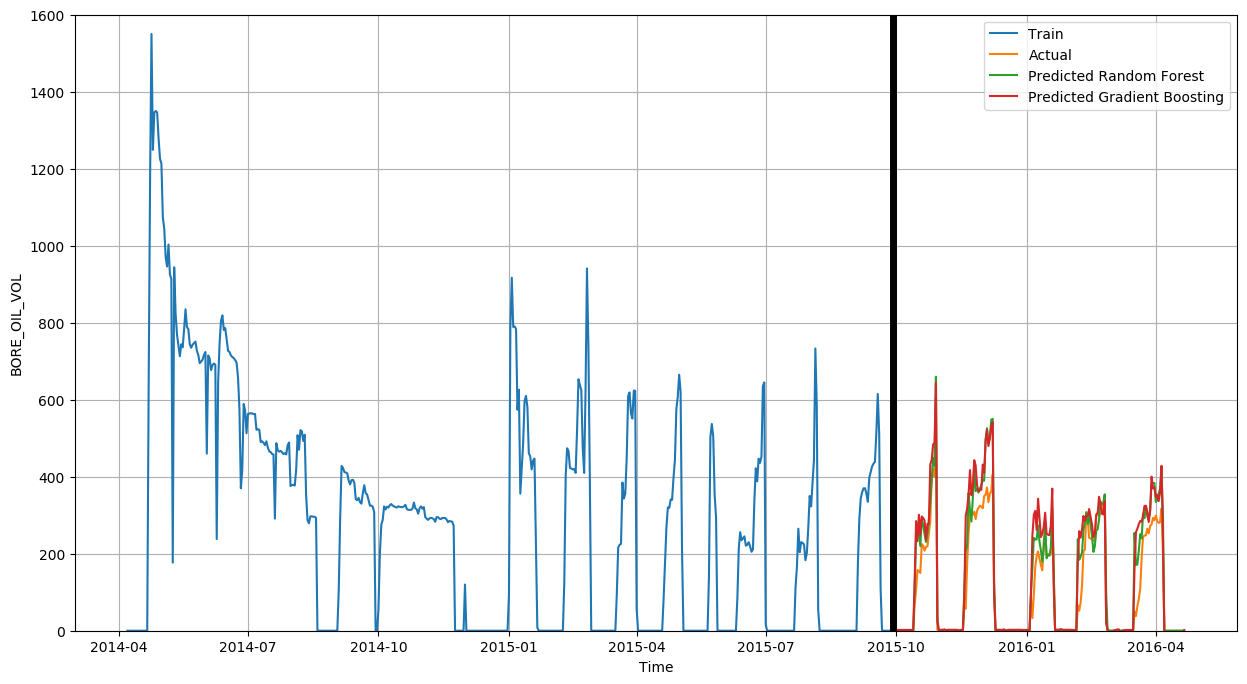

In [36]:
plt.style.use('default')
plt.figure(figsize=(15,8))
plt.plot(X_train.index,y_train,label = 'Train')
plt.plot(X_test.index,y_test,label= 'Actual')
plt.plot(X_test.index,y_predict_RF,label = 'Predicted Random Forest')
plt.plot(X_test.index,y_predict_GB,label = 'Predicted Gradient Boosting')
plt.axvline(X_test.index[0], color='black',lw=5)
plt.ylim(0,1600)

plt.ylabel('BORE_OIL_VOL')
plt.xlabel('Time')
plt.grid('True')
plt.legend()

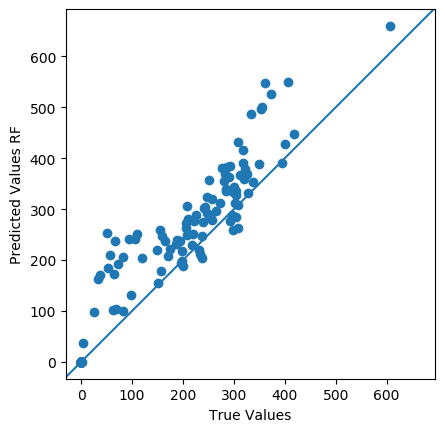

In [37]:
plt.scatter(y_test, y_predict_RF)
plt.xlabel('True Values')
plt.ylabel('Predicted Values RF')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,4000],[-400,4000])

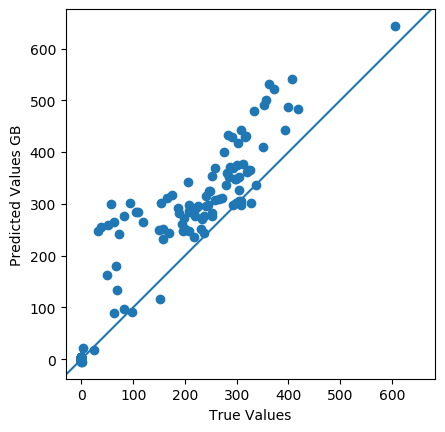

In [38]:
plt.scatter(y_test, y_predict_GB)
plt.xlabel('True Values')
plt.ylabel('Predicted Values GB')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,4000],[-400,4000])

In [68]:
from sklearn import metrics 

MAE =metrics.mean_absolute_error(y_test,y_predict_RF) 
MSE = metrics.mean_squared_error(y_test,y_predict_RF)
print(MSE,MAE)

3056.5869126213597 30.653106796116504


In [69]:
from sklearn import metrics 

MAE =metrics.mean_absolute_error(y_test,y_predict_GB) 
MSE = metrics.mean_squared_error(y_test,y_predict_GB)
print(MSE,MAE)

4942.9352616261995 41.24223987349213


### Neural

In [39]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
to_drop =['NPD_WELL_BORE_CODE',"BORE_GAS_VOL",'AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME']
df1cnn= df1c.drop(to_drop,axis = 1)
df1cnn.head()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_WAT_VOL
DATEPRD,,,,,,,,,
2014-04-07,0.0,0.000,0.000,0.00000,0.000,0.00,0.000,0,0
2014-04-08,0.0,0.000,0.000,1.00306,0.000,0.00,0.000,0,0
2014-04-09,0.0,0.000,0.000,0.97901,0.000,0.00,0.000,0,0
2014-04-10,0.0,0.000,0.000,0.54576,0.000,0.00,0.000,0,0
2014-04-11,0.0,310.376,277.278,1.21599,33.098,10.48,33.072,0,0


In [41]:
df_train = df1cnn.iloc[:540, :]
df_test = df1cnn.iloc[540: , :]

In [42]:
df_train.shape , df_test.shape

((540, 9), (206, 9))

In [43]:
train_labels = df_train.pop('BORE_OIL_VOL')
test_labels = df_test.pop('BORE_OIL_VOL')

In [44]:
train_stats = df_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
ON_STREAM_HRS,540.0,14.346500,11.484348,0.0,0.000000,24.000000,24.000000,25.00000
AVG_DOWNHOLE_PRESSURE,540.0,242.188780,35.035065,0.0,220.101750,234.107000,266.604500,313.87100
AVG_DP_TUBING,540.0,189.638287,40.237323,0.0,167.203750,180.990500,198.775750,305.97600
AVG_CHOKE_SIZE_P,540.0,31.437313,24.706910,0.0,0.116175,46.862065,50.524727,93.63543
AVG_WHP_P,540.0,52.550494,30.070236,0.0,35.338750,44.847000,70.051250,133.59300
AVG_WHT_P,540.0,41.349585,24.448339,0.0,13.975250,53.794000,59.326500,83.42000
DP_CHOKE_SIZE,540.0,30.422211,27.688631,0.0,8.699250,18.965500,43.345750,115.63900
BORE_WAT_VOL,540.0,237.068519,308.208681,0.0,0.000000,79.500000,332.250000,1417.00000


In [45]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
normed_train_data = norm(df_train)
normed_test_data = norm(df_test)

In [46]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [47]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [48]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation = tf.nn.relu,input_shape=[len(df_train.keys())]),
        layers.Dense(64,activation = tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss = 'mse',optimizer = optimizer,metrics=['mae','mse'])
    return model

In [49]:
model = build_model()

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [51]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 ==0: print("")
    print('.',end = '')
EPOCHS = 1000
history = model.fit(
    normed_train_data, train_labels,
    epochs = EPOCHS, validation_split = 0.2, verbose = 0,
    callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [52]:
hist = pd.DataFrame(history.history)
hist['epoch']= history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1039.406899,18.332073,1039.406860,6473.504268,41.212353,6473.503906,995
996,1055.125906,18.628584,1055.125977,6757.440104,41.784081,6757.439941,996
997,1022.168850,18.511061,1022.168823,6051.383825,39.148518,6051.384277,997
998,1055.539112,18.707388,1055.539062,6914.973958,42.847446,6914.974121,998
999,1081.309890,18.868179,1081.309814,6461.555339,40.658234,6461.555664,999


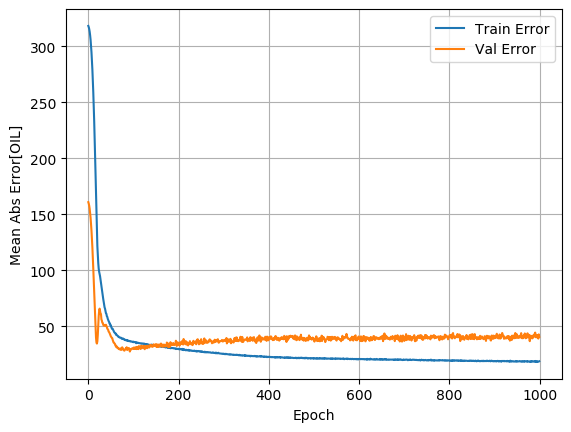

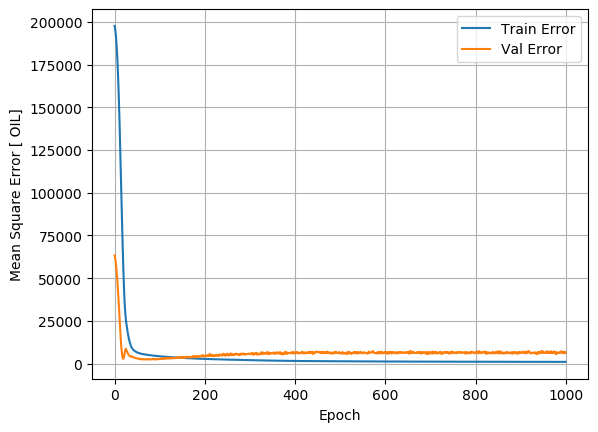

In [53]:
import matplotlib.pyplot as plt
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error[OIL]')
  plt.plot(hist['epoch'],hist['mae'],
           label = 'Train Error')
  plt.plot(hist['epoch'],hist['val_mae'],
           label = 'Val Error')
  plt.legend()
  plt.grid()
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [ OIL]')
  plt.plot(hist['epoch'],hist['mse'],label = 'Train Error')
  plt.plot(hist['epoch'],hist['val_mse'],label = 'Val Error')
  plt.legend()
  plt.grid()

plot_history(history)

In [54]:
loss, mae , mse = model.evaluate(normed_test_data, test_labels, verbose = 0)
print('Mean Absolute Error', mae)
print('Mean Square Error', mse)

Mean Absolute Error 23.615583
Mean Square Error 1570.6381


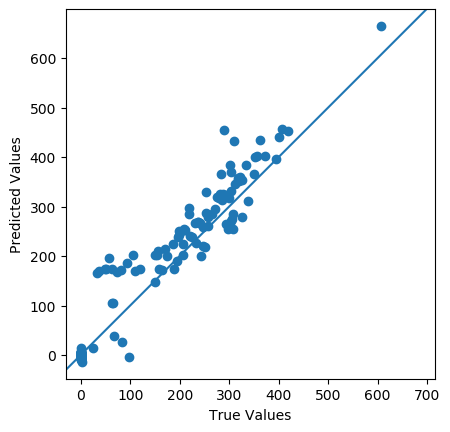

In [55]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,1200],[-400,1200])

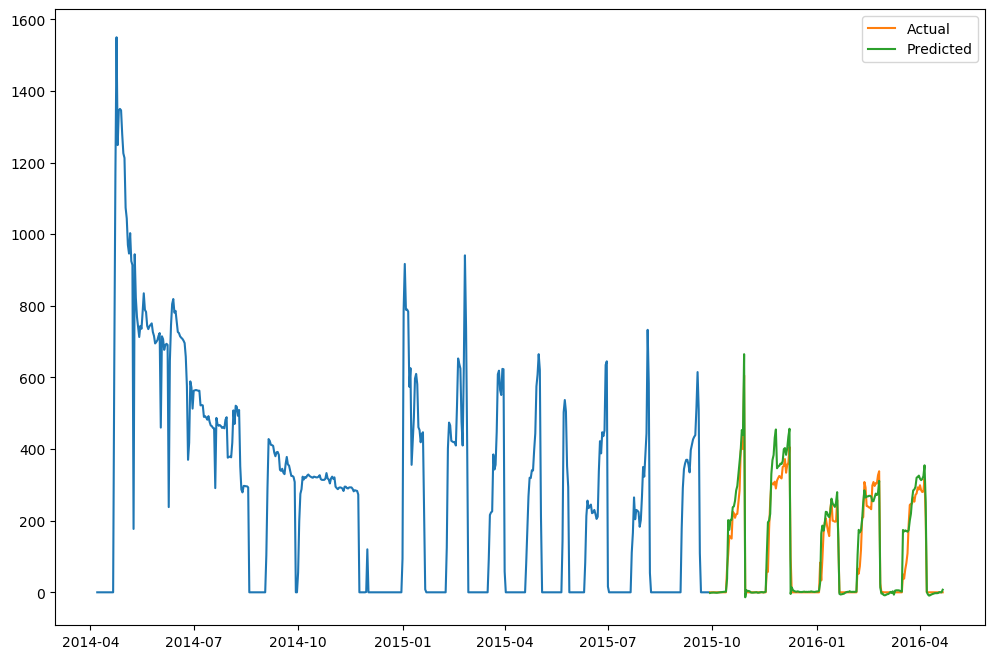

In [56]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,train_labels)
plt.plot(df_test.index,test_labels,label= 'Actual')
plt.plot(df_test.index,test_predictions,label = 'Predicted')
plt.legend()


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...............................................................................

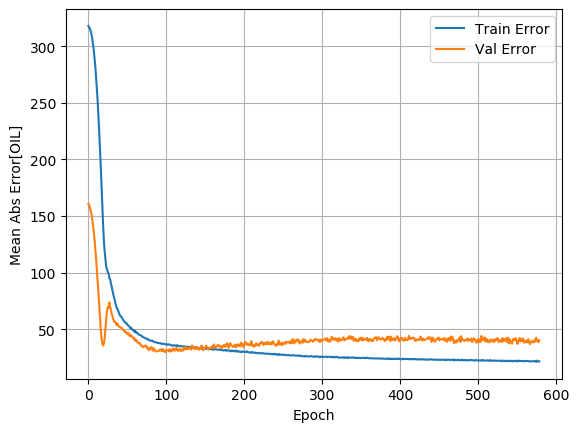

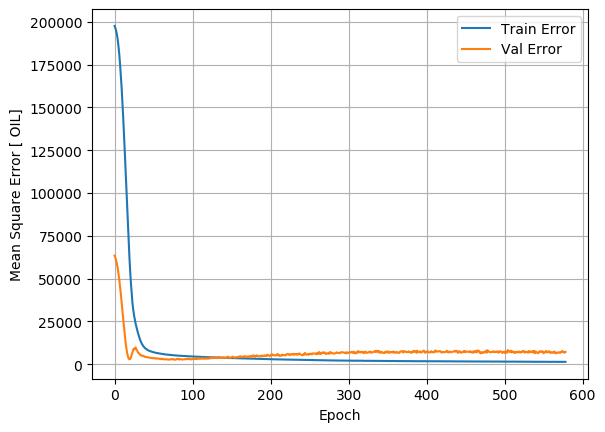

In [57]:
model = build_model()
#Patience is for checking the amount of epochs for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 500)

history = model.fit(normed_train_data, train_labels, epochs = EPOCHS, validation_split=0.2, verbose=0,callbacks=[early_stop,PrintDot()])
plot_history(history)

In [72]:
loss, mae , mse = model.evaluate(normed_test_data, test_labels, verbose = 0)
print('Mean Absolute Error', mae)
print('Mean Squared Error', mse)


Mean Absolute Error 20.527868
Mean Squared Error 1268.0426


(0, 700)

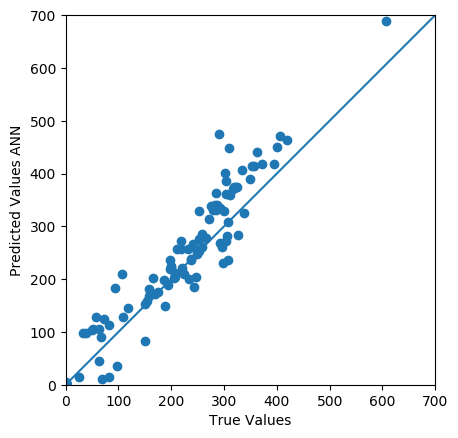

In [67]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values ANN')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,1200],[-400,1200])
plt.xlim(0,700)
plt.ylim(0,700)

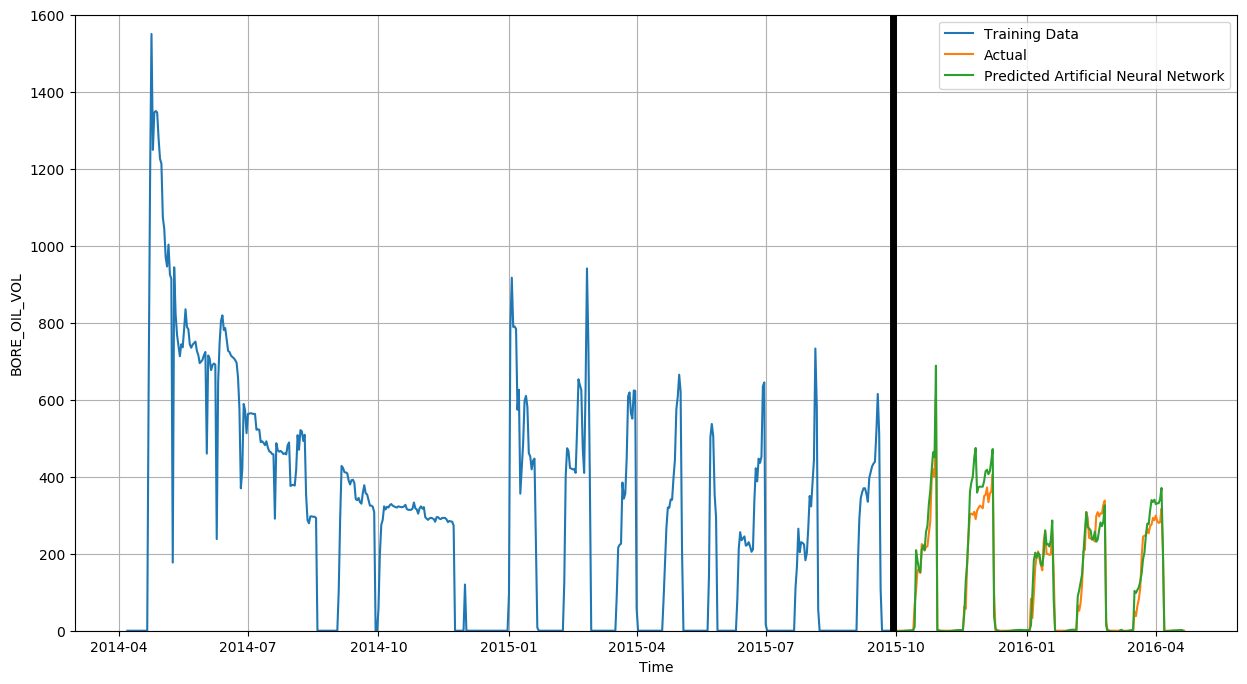

In [64]:
plt.figure(figsize=(15,8))

plt.style.use('default')

plt.ylim(0,1600)

plt.ylabel('BORE_OIL_VOL')
plt.xlabel('Time')
plt.grid('True')


plt.plot(df_train.index,train_labels,label = 'Training Data')
plt.plot(df_test.index,test_labels,label= 'Actual')
plt.plot(df_test.index,test_predictions,label = 'Predicted Artificial Neural Network')
plt.axvline(df_test.index[0], color='black',lw=5)
plt.legend()

